In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ML Beispiele"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
data = pd.read_excel('Diplomierte IS2 seit 1974.xlsx', index_col=0)  

In [3]:
Bio_äq = ['Zoologie', 'Botanik', 'Physiologie']
Geo_äq = ['Geologie', 'Geologie/Paläontologie', 'Mineralogie']
Ge_äq = ['Soziologie', 'Urgeschichte' ]
WR_äq = ['Nationalökonomie', 'Wirtschaftskunde']
P_äq = ['Astronomie']
M_äq = ['Mathematische Statistik und Versicherungslehre']
C_äq = ['Bio-Chemie']
PP_äq = ['Pädagogik', 'Psychologie', 'Pädagogik/Psychologie' ]
Mu_äq = ['Musikwissenschaften']
S_äq = ['Turnen']
Rel_äq = ['Religion', 'Rl']
D_äq = ['Deutsch als Zweitsprache']
BG_äq = ['Zeichnen']
Ital_äq = ['J']

In [4]:
data_c = data.copy()

In [5]:
cols = ['DF1', 'DF2', 'DF3', 'DF4']
repl = [(Bio_äq, 'Biologie'), (Geo_äq, 'Geografie'), (Ge_äq, 'Geschichte'), (WR_äq, 'Wirtschaft und Recht'), \
        (P_äq, 'Physik'), (M_äq, 'Mathematik'), (C_äq, 'Chemie'), (PP_äq, 'Pädagogik_Psychologie'), \
        (Mu_äq, 'Musik'), (S_äq, 'Sport'), (Rel_äq, 'Religionslehre'), (D_äq, 'Deutsch'),(BG_äq, 'Bildnerisches Gestalten'), (Ital_äq, 'Italienisch')]

for col in cols:
    for fächer in repl: 
        data_c[col] = data_c[col].replace(fächer[0], fächer[1])



In [6]:
# Ergänzen des Datenfiles mit dem Alter
data_cc = data_c.copy()
data_cc.reset_index(inplace=True)

d_list = []

import datetime
for i in range(0, len(data_cc)):
    if data_cc['Semester'][i] == 'FS':
        d = datetime.datetime(data_cc['Jahr'][i], 1, 31)
    else:
        d = datetime.datetime(data_cc['Jahr'][i], 7, 31)
    

    d_list.append(d)

Geburtsdatum = pd.DatetimeIndex(data_cc['Geburtsdatum'])    
alter = []
for i in range (0,len(data_cc)):
    alter.append(((d_list[i]-Geburtsdatum[i]).days/365))

data_cc['Alter bei Diplomierung'] = alter
data_cc['Alter bei Diplomierung'][2226]


27.964383561643835

In [7]:
data_cc.head()

,Jahr,Semester,Titel,Name,Vorname,Geschlecht,Geburtsdatum,Adresse,Heimatort,DF1,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Alter bei Diplomierung
0,1974,FS,NaN,Bertschy,Christoph,m,NaT,"Eigerweg 28, 3075 Gümligen",NaN,phil.-hist.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1974,FS,NaN,Fenner,Martin,m,NaT,"Klaraweg 9, 3006 Bern",NaN,phil.-hist.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1974,FS,NaN,Herren,Peter,m,NaT,"Ulmenweg 29, 3604 Thun",NaN,phil.-hist.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1974,FS,NaN,Jaggi,Jürg,m,NaT,"Schweizerbodenweg 4, 2502 Biel",NaN,phil.-hist.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1974,FS,NaN,Matti,Thomas,m,NaT,"Weihermattstr. 32, 3027 Bern",NaN,phil.-hist.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = data_cc[['Jahr', 'Semester', 'Name', 'Vorname', 'Geschlecht', 'DF1', 'Alter bei Diplomierung']]
df.head()

,Jahr,Semester,Name,Vorname,Geschlecht,DF1,Alter bei Diplomierung
0,1974,FS,Bertschy,Christoph,m,phil.-hist.,NaN
1,1974,FS,Fenner,Martin,m,phil.-hist.,NaN
2,1974,FS,Herren,Peter,m,phil.-hist.,NaN
3,1974,FS,Jaggi,Jürg,m,phil.-hist.,NaN
4,1974,FS,Matti,Thomas,m,phil.-hist.,NaN


In [9]:
df = df.dropna()

In [10]:
### Encoding some Rows
df.DF1 = pd.Categorical(df.DF1)
df['DF1code'] = df.DF1.cat.codes
df

,Jahr,Semester,Name,Vorname,Geschlecht,DF1,Alter bei Diplomierung,DF1code
33,1975,HS,Boldini,Mario Bruno,m,Deutsch,35.120548,3
34,1975,HS,Frautschi,Emanuel A.,m,Französisch,25.884932,5
35,1975,HS,Geiger,Urs,m,Italienisch,28.772603,10
36,1975,HS,Hostettler,Christian,m,Deutsch,35.331507,3
37,1975,HS,Iseli,Manfred,m,Geschichte,27.975342,7
...,...,...,...,...,...,...,...,...
4314,2021,HS,Wiget,Jennifer,f,Englisch,26.326027,4
4315,2021,HS,Würsten,Marius Julian,m,Französisch,27.635616,5
4316,2021,HS,Zahnd,Yanick,m,Geschichte,30.005479,7
4317,2021,HS,Zoric,Tea,f,Deutsch,29.175342,3


In [11]:
coding = [(df['DF1code'].unique()[i], df['DF1'].unique()[i]) for i in range(0,22)]
coding.sort(key=lambda y: y[1])
coding


[(0, 'Bildnerisches Gestalten'),
 (1, 'Biologie'),
 (2, 'Chemie'),
 (3, 'Deutsch'),
 (4, 'Englisch'),
 (5, 'Französisch'),
 (6, 'Geografie'),
 (7, 'Geschichte'),
 (8, 'Griechisch'),
 (9, 'Informatik'),
 (10, 'Italienisch'),
 (11, 'Latein'),
 (12, 'Mathematik'),
 (13, 'Musik'),
 (14, 'Philosophie'),
 (15, 'Physik'),
 (16, 'Pädagogik_Psychologie'),
 (17, 'Religionslehre'),
 (18, 'Russisch'),
 (19, 'Spanisch'),
 (20, 'Sport'),
 (21, 'Wirtschaft und Recht')]

In [12]:
##New codes for Disziplines
DF1code2 = []
for x in df['DF1']:
    if x == 'Bildnerisches Gestalten':
        DF1code2.append(0)
    elif x == 'Deutsch':
        DF1code2.append(1)
    elif x == 'Englisch':
        DF1code2.append(2)
    elif x == 'Französisch':
        DF1code2.append(3) 
    elif x == 'Italienisch':
        DF1code2.append(4)
    elif x == 'Spanisch':
        DF1code2.append(5)
    elif x == 'Russisch':
        DF1code2.append(6)
    elif x == 'Latein':
        DF1code2.append(7)
    elif x == 'Griechisch':
        DF1code2.append(8) 
    elif x == 'Biologie':
        DF1code2.append(9)
    elif x == 'Pädagogik_Psychologie':
        DF1code2.append(10)    
    elif x == 'Religionslehre':
        DF1code2.append(11)
    elif x == 'Sport':
        DF1code2.append(12)
    elif x == 'Geschichte':
        DF1code2.append(13) 
    elif x == 'Geografie':
        DF1code2.append(14)
    elif x == 'Musik':
        DF1code2.append(15)       
    elif x == 'Philosophie':
        DF1code2.append(16) 
    elif x == 'Wirtschaft und Recht':
        DF1code2.append(17)
    elif x == 'Chemie':
        DF1code2.append(18)
    elif x == 'Physik':
        DF1code2.append(19)
    elif x == 'Mathematik':
        DF1code2.append(20) 
    elif x == 'Informatik':
        DF1code2.append(21)         
    else: print('error on disziplin')       
        
df['DF1code2'] = DF1code2

## Decision Tree 

In [93]:
X = np.array(df[['Jahr', 'Alter bei Diplomierung', 'DF1code2']])
y = np.array(df['Geschlecht'])

In [94]:
##Train-Test Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X), len(X_train))

3280 2197


In [97]:
from sklearn.tree import DecisionTreeClassifier
Tclf = DecisionTreeClassifier(random_state=0, max_depth=5)
Tclf.fit(X, y)
result = Tclf.predict(X_test)
Tclf.score(X_test, y_test)

0.7239150507848569

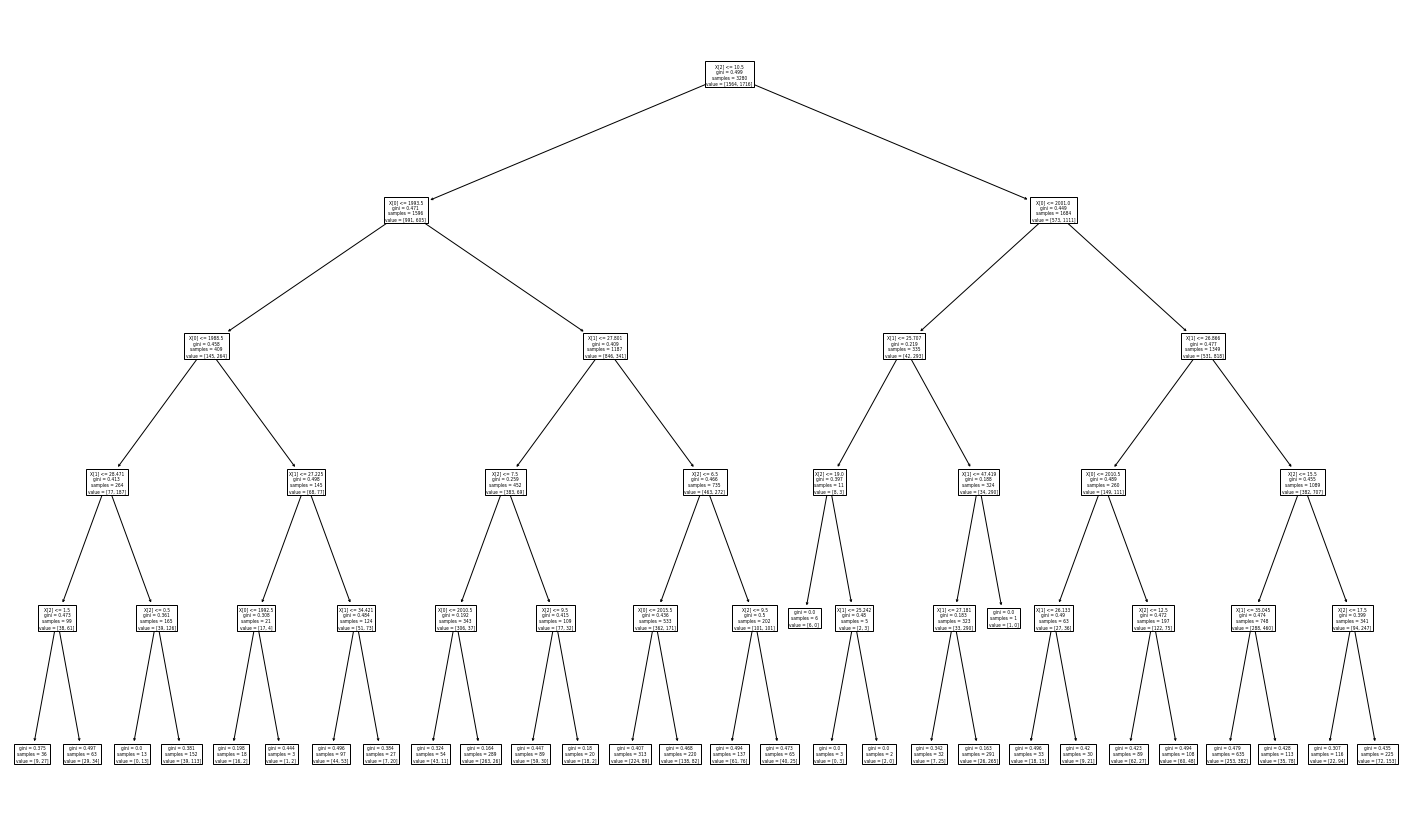

In [98]:
from sklearn.tree import plot_tree
plot_tree(Tclf)
plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

In [113]:
##Vorhersage

#Fächercode:
# 0 - Bildnerisches Gestalten
# 1 - Deutsch
# 2 - Englisch
# 3 - Französisch
# 4 - Italienisch
# 5 - Spanisch
# 6 - Russisch
# 7 - Latein
# 8 - Griechisch
# 9 - Biologie
# 10 - Pädagogik_Psychologie
# 11 - Religionslehre
# 12 - Sport
# 13 - Geschichte
# 14 - Geografie
# 15 - Musik
# 16 - Philosophie
# 17 - Wirtschaft und Recht
# 18 - Chemie
# 19 - Physik
# 20 - Mathematik
# 21 - Informatik

Diplomjahrgang = 2018
Alter = 45
Fächercode = 1

pred = Tclf.predict(np.array([Diplomjahrgang, Alter, Fächercode]).reshape(1,-1))
print(pred)
pred_proba = Tclf.predict_proba(np.array([Diplomjahrgang, Alter, Fächercode]).reshape(1,-1))
print(pred_proba)

['f']
[[0.62727273 0.37272727]]


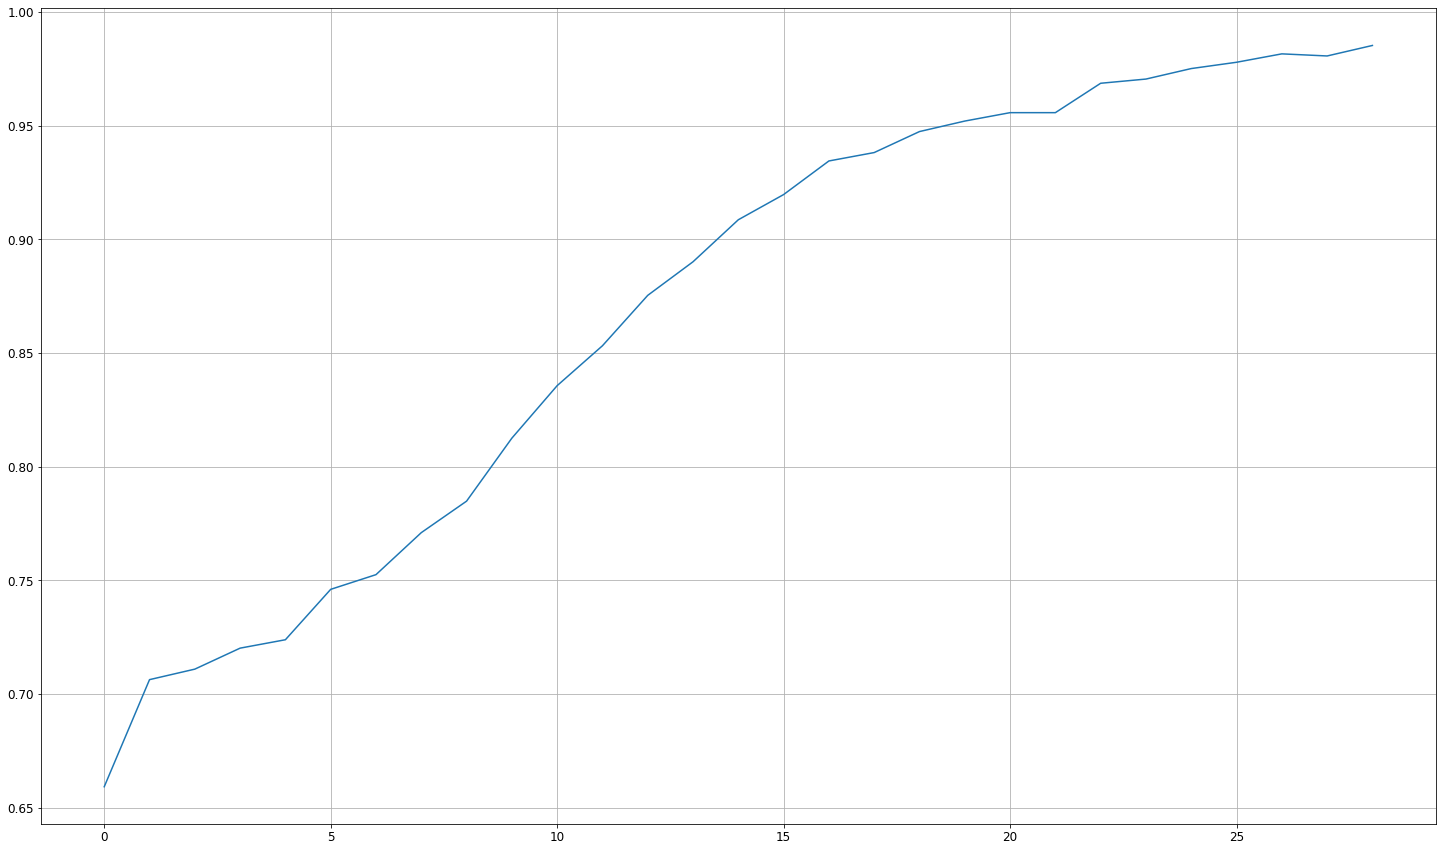

In [18]:
### Trees
from sklearn.tree import DecisionTreeClassifier

scr = []

for i in range(1,30):
    Tclf = DecisionTreeClassifier(random_state=0, max_depth=i)
    Tclf.fit(X, y)
    result = Tclf.predict(X_test)
    scr.append(Tclf.score(X_test, y_test))

plt.plot(scr)
plt.grid()

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

L_clf = LogisticRegression()
L_clf.fit(X_train, y_train)
y_pred = L_clf.predict(X_test)

L_clf.score(X_test, y_test)


0.6509695290858726

## SVM

In [44]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

svm_clf.score(X_test, y_test)

0.5318559556786704

## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(max_depth=5, n_estimators = 2000, n_jobs = -1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

    
print(rf_clf.score(X_test, y_test))
print()

print('Relative Wichtigkeit der drei Merkmale')

for name, score in zip(['Jahr', 'Alter bei Diplomierung', 'DF1code2'], rf_clf.feature_importances_):
    print(name, score)

0.7082179132040628

Relative Wichtigkeit der drei Merkmale
Jahr 0.29156146899072505
Alter bei Diplomierung 0.30922499987728036
DF1code2 0.3992135311319945


## Voting Classifier

In [88]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier( estimators=[('lr', L_clf), ('scv', svm_clf), ('rf', rf_clf)], voting = 'hard')
voting_clf.fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.6934441366574331

In [89]:
from sklearn.metrics import accuracy_score
names = ['LogisticRegression:', 'SVM:', 'RandomForest:', 'Voting:']
n = 0
for clf in [L_clf, svm_clf, rf_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(names[n], accuracy_score(y_test, y_pred))
    n += 1

LogisticRegressio: 0.6509695290858726
SVM: 0.5318559556786704
RandomForest: 0.7072945521698984
Voting: 0.6925207756232687


## Bagging 

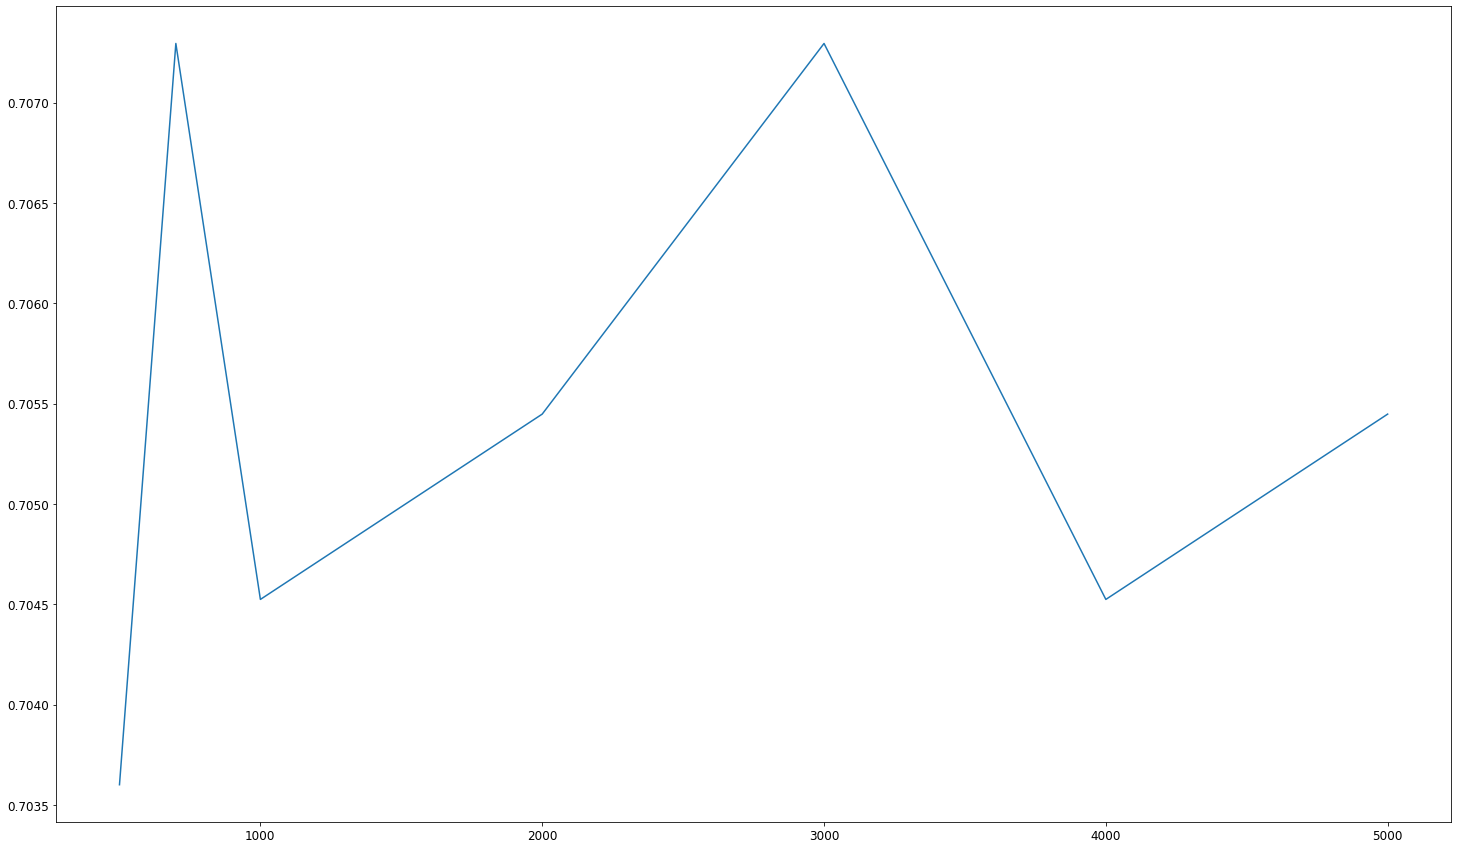

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

num_est = [500, 700, 1000, 2000, 3000, 4000, 5000]
lst = []
for i in num_est:
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(max_depth=5), n_estimators= i, 
        max_samples = 1000, bootstrap = True, n_jobs = -1)

    bag_clf.fit(X_train, y_train)

    y_pred = bag_clf.predict(X_test)

    lst.append(bag_clf.score(X_test, y_test))

plt.plot(num_est, lst)

## K-Means 

In [19]:
Xk = df[['Jahr','Geschlecht', 'Alter bei Diplomierung', 'DF1code2']]

### Encoding some Rows
Xk.Geschlecht = pd.Categorical(Xk.Geschlecht)
Xk['GeschlCode'] = Xk.Geschlecht.cat.codes
Xk['Jahr']=(Xk['Jahr']-1974)/47
Xk['DF1code2'] = Xk['DF1code2']/21
Xk['Alter bei Diplomierung'] = -(0-Xk['Alter bei Diplomierung'])/72

X = Xk[['Jahr','Alter bei Diplomierung','GeschlCode', 'DF1code2']]
X

C:\Users\M1HB\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-19-f270b0b1c1c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xk['GeschlCode'] = Xk.Geschlecht.cat.codes
<ipython-input-19-f270b0b1c1c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Jahr,Alter bei Diplomierung,GeschlCode,DF1code2
33,0.021277,0.487785,1,0.047619
34,0.021277,0.359513,1,0.142857
35,0.021277,0.399619,1,0.190476
36,0.021277,0.490715,1,0.047619
37,0.021277,0.388546,1,0.619048
...,...,...,...,...
4314,1.000000,0.365639,0,0.095238
4315,1.000000,0.383828,1,0.142857
4316,1.000000,0.416743,1,0.619048
4317,1.000000,0.405213,0,0.047619


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)


In [21]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [22]:
kmeans.cluster_centers_

array([[6.54032138e-01, 4.41009653e-01, 1.00000000e+00, 5.31662782e-01],
       [7.86948359e-01, 4.22574274e-01, 1.44328993e-15, 3.51083912e-01]])

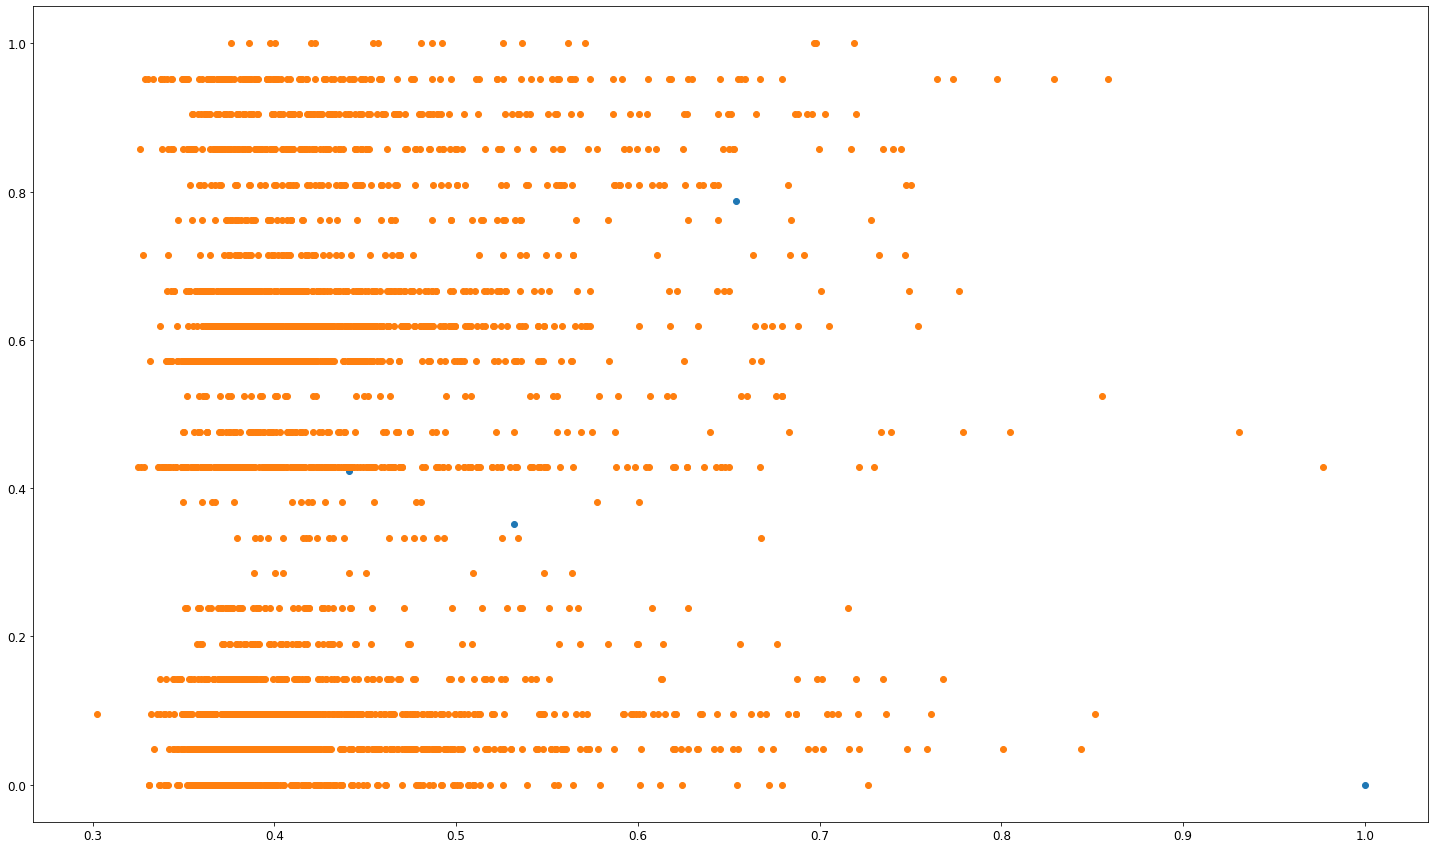

In [23]:
plt.scatter(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1] )
plt.scatter(X['Alter bei Diplomierung'], X['DF1code2'])

<AxesSubplot:>

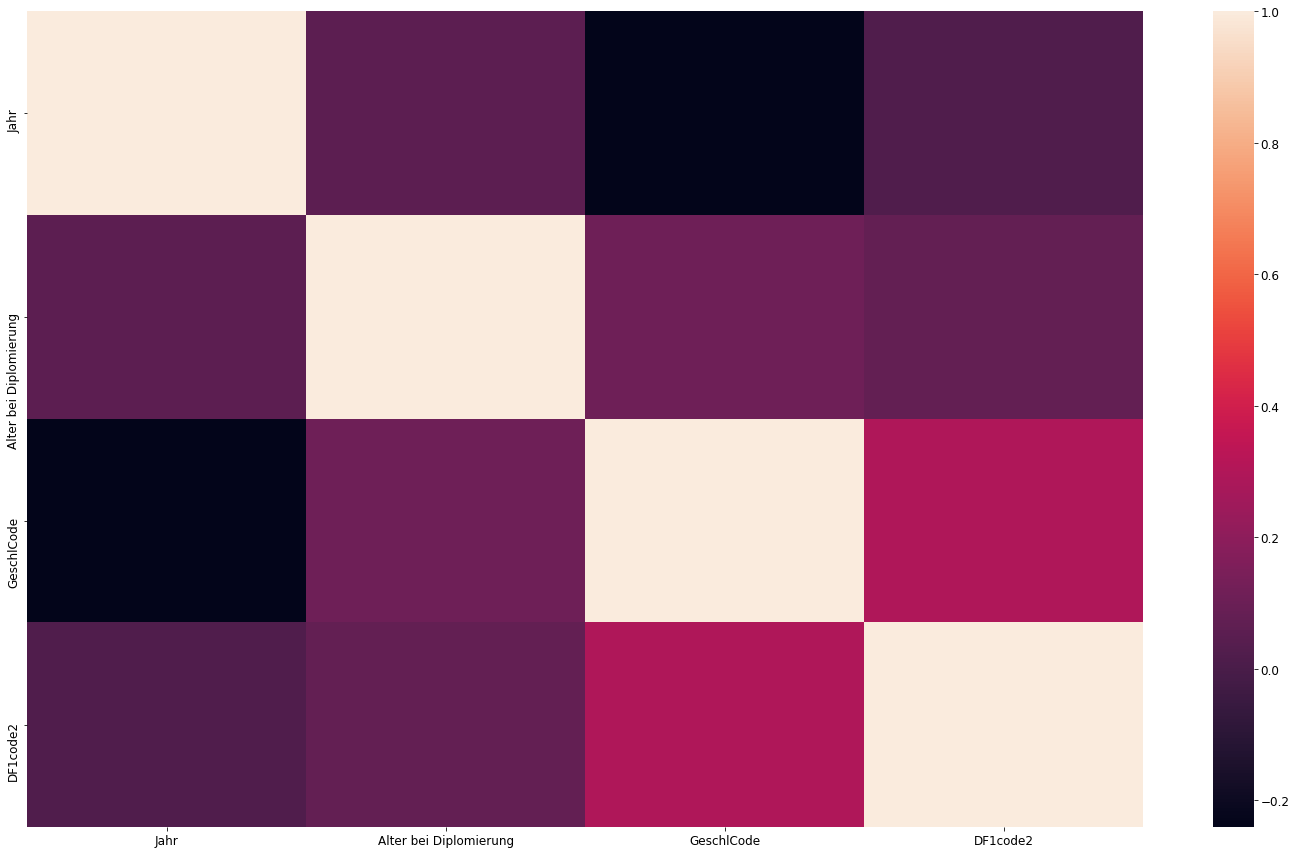

In [24]:
import seaborn as sns

sns.heatmap(X.corr())